In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import random 
import scipy.stats as stats
import matplotlib.pyplot as plt
import sys, os
import warnings
import processing_module as pm
import scipy.stats as stats
from tqdm import tqdm

warnings.filterwarnings("ignore")

<span style="color:orange">
    
## Preferential attachment ##

В этой модели новый узел присоединяется к уже существующему узлу $i$ в ненаправленном графе с вероятностью, вычисляемой по формуле:

\begin{equation}\label{F1}
P_{PA}(i,t) = \dfrac{d_{i,t}}{\sum\limits_{s \in V_{t}} d_{s,t}},
\end{equation}

где $d_{i,t}$ - это количество связей узла $i$, принадлежащего множеству узлов $V_{t}$ в момент времени $t$. 

In [2]:
def gen_graph_PA(G_input: nx.Graph, num_nodes: int, num_neigh: int) -> nx.Graph:
    """
    Функция генерации вершин графа методом предпочтительного присоединения.
    Используются библиотеки tqdm, networkx.
    
    Input:
        G_input - изначальный неориентированный граф к которому присоединяются новые вершины.
        num_nodes - количество присоединяемых вершин.
        num_neigh - количество соседий, к которым присоединяется новая вершина.
        
    Output:
        Изначальный неориентированный граф к которому присоеденены вершины.
    """
    i_start = len(list(G_input.nodes))
    print(i_start)
    for i in tqdm(range(i_start + 1, i_start + num_nodes)):
        k = []
        for i1 in range(num_neigh):
            k.append((random.choices(list(dict(G_input.degree()).keys()), weights=list(dict(G_input.degree()).values())))[0])
        for i1 in range(num_neigh):
            G_input.add_edge(k[i1], i)     
    return G_input

In [3]:
data_pa = {
    'Source': [1, 2, 3],
    'Target': [2, 3, 1],
}

row_labels = [1, 2, 3]

PA_graph = pd.DataFrame(data=data_pa, index=row_labels)

G_pa = nx.Graph()
G_pa.add_edges_from(PA_graph.values.tolist())


num_neigh = 5
num_nodes = 100


if (False):
    G_pa_1 = gen_graph_PA(G_pa, num_nodes, num_neigh)
    print(G_pa_1)

<span style="color:orange">
    
## Clustering attachment ##

The attachment to an existing node i is proceeded with probability proportional to its clustering coefficient:

PCA(i) ∝ cαi + ϵ, 

ci = 2∆i / ki(ki − 1)


In [4]:
def gen_graph_CA(G_input: nx.Graph, num_nodes: int, num_neigh: int) -> nx.Graph:
    """
    Функция генерации вершин графа методом кластерного присоединения.
    Используются библиотеки tqdm, networkx.
    Содержит циклы так как k.append((random.choices)) может выдавать 2 одинаковых числа. 
    
    Input:
        G_input - изначальный неориентированный граф к которому присоединяются новые вершины.
        num_nodes - количество присоединяемых вершин.
        num_neigh - количество соседий, к которым присоединяется новая вершина.
        
    Output:
        Изначальный неориентированный граф к которому присоеденены вершины.
    """
    i_start = len(list(G_input.nodes))
    for i in tqdm(range(i_start + 1, i_start + num_nodes)):
        local_calst = list(nx.clustering(G_input).values())
        for j in range(len(local_calst)):
            local_calst[j] += 0.001
        k = []
        for i1 in range(num_neigh):
            k.append((random.choices(list(nx.clustering(G_input).keys()), weights=local_calst))[0])
        for i1 in range(num_neigh):
            G_input.add_edge(k[i1], i)
    return G_input

In [5]:
data_ca = {
    'Source': [1, 2, 3],
    'Target': [2, 3, 1],
}

row_labels = [1, 2, 3]

CA_graph = pd.DataFrame(data=data_ca, index=row_labels)

G_ca = nx.Graph()
G_ca.add_edges_from(CA_graph.values.tolist())

num_neigh = 5
num_nodes = 100


if (False):
    G_ca_1 = gen_graph_CA(G_ca, num_nodes, num_neigh)
    print(G_ca_1)

In [6]:
if (False):
    my_path = os.path.abspath("") + "/.."
    (nx.to_pandas_edgelist(G_ca)).to_csv(my_path + "/Data_postproc" + '/CA_graph.csv', index=False)

<span style="color:orange">
    
## Alpha Betta Gamma scheme ##

In [ ]:
def gen_graph_ABG(G_input: nx.DiGraph, num_nodes: int, alpha: float, beta: float) -> nx.DiGraph:
    """
    Функция генерации вершин графа методом альфа, бетта, гамма присоединения.
    Используются библиотеки tqdm, networkx.
    gamma = 1 - (alpha + beta).
    
    Input:
        G_input - изначальный ориентированный граф к которому присоединяются новые вершины.
        num_nodes - количество итераций алгоритма.
        alpha - float.
        beta - float. 
        
    Output:
        Изначальный граф к которому присоеденены вершины.
    """
    assert (alpha + beta) > 1
    assert type(G_input) = nx.DiGraph
    
    i_start = len(list(G_input.nodes))
    gamma = 1 - alpha - beta
    print(alpha, beta, gamma, G_input)
    # for i in tqdm(range(i_start + 1, i_start + num_nodes)):
    #     local_calst = list(nx.clustering(G_input).values())
    #     for j in range(len(local_calst)):
    #         local_calst[j] += 0.001
    #     k = []
    #     for i1 in range(num_neigh):
    #         k.append((random.choices(list(nx.clustering(G_input).keys()), weights=local_calst))[0])
    #     for i1 in range(num_neigh):
    #         G_input.add_edge(k[i1], i)
    return G_input

<span style="color:orange">
    
## Graph generation ##

In [7]:
if (True):
    my_path = os.path.abspath("") + "/.."
    CA_graph_df = pd.read_csv(my_path + "/Data_postproc" + "/Big_graph" + '/CA_PA_19_nodes.csv')
    G_init = nx.from_pandas_edgelist(CA_graph_df)

In [8]:
print(G_init)

Graph with 7983 nodes and 39743 edges


In [10]:
data_init = {
    'Source': [1, 2, 3],
    'Target': [2, 3, 1],
}

row_labels = [1, 2, 3]

graph_init = pd.DataFrame(data=data_init, index=row_labels)

G_init = nx.Graph()
G_init.add_edges_from(graph_init.values.tolist())

num_neigh = 5
num_nodes = 400
blocks = 40
pr = []


for i in range(0, blocks):
    pr.append([])


"""
Генерация графа
"""
if (False):
    my_path = os.path.abspath("") + "/.."
    for t in range(0, blocks//2):
        G_init = gen_graph_CA(G_init, num_nodes, num_neigh)
        pr[t] = list((nx.pagerank(G_init)).values())[-num_nodes:-1]
        (nx.to_pandas_edgelist(G_init)).to_csv(my_path + "/Data_postproc" + "/Big_graph" + "/CA_PA_" \
                                               + str(t) + "_nodes" + ".csv", index=False)   

    for t in range(blocks//2, blocks):
        G_init = gen_graph_PA(G_init, num_nodes, num_neigh)
        pr[t] = list((nx.pagerank(G_init)).values())[-num_nodes:-1]
        (nx.to_pandas_edgelist(G_init)).to_csv(my_path + "/Data_postproc" + "/Big_graph" + "/CA_PA_" \
                                               + str(t) + "_nodes" + ".csv", index=False)


"""
Запись графа
"""
if (False):
    my_path = os.path.abspath("") + "/.."
    CA_graph_df = pd.read_csv(my_path + "/Data_postproc" + '/CA_PA_graph_12knodes.csv')
    G_init = nx.from_pandas_edgelist(CA_graph_df)


"""
Загрузка цепочек данных
"""
if(True):
    for t in range(0, blocks):
        my_path = os.path.abspath("") + "/.."
        CA_graph_df = pd.read_csv(my_path + "/Data_postproc" + "/Big_graph" + "/CA_PA_" \
                                                   + str(t) + "_nodes" + ".csv")
        G_init = nx.from_pandas_edgelist(CA_graph_df)
        pr[t] = list((nx.pagerank(G_init)).values())[-num_nodes:-1]

In [11]:
# for t in range(0, blocks//2):
#     G_init = gen_graph_CA(G_init, num_nodes, num_neigh)
#     pr[t] = list((nx.pagerank(G_init)).values())[-num_nodes:-1]
#     (nx.to_pandas_edgelist(G_init)).to_csv(my_path + "/Data_postproc" + "/Big_graph" + "/CA_PA_" \
#                                                + str(t) + "_nodes" + ".csv", index=False)


# for t in range(0, blocks//2):
#     my_path = os.path.abspath("") + "/.."
#     CA_graph_df = pd.read_csv(my_path + "/Data_postproc" + "/Big_graph" + "/CA_PA_" \
#                                                + str(t) + "_nodes" + ".csv")
#     G_init = nx.from_pandas_edgelist(CA_graph_df)
#     pr[t] = list((nx.pagerank(G_init)).values())[-num_nodes:-1]

In [12]:
if (False):
    my_path = os.path.abspath("") + "/.."
    i = 10
    (nx.to_pandas_edgelist(G_init)).to_csv(my_path + "/Data_postproc" + '/CA_PA_' + str(i) + '_nodes' + '.csv', index=False)

In [15]:
print(len(pr[19]))

399


In [13]:
x_gr = list()
y_gr = list()
for i in range(blocks):
    x = pm.hill(pr[i])
    eye_val = (pm.eye_ball(x))[0]
    x_gr.append(i)
    y_gr.append(eye_val)
    print(i, eye_val)

0 0.18271080127350992
1 0.11869367995466096
2 0.0786646807459439
3 0.10039877679105924
4 0.12581930595061674
5 0.08888127726330453
6 0.16426261406267617
7 0.1889485708196581
8 0.19151364473314203
9 0.26302801240196416
10 0.1805071964386853
11 0.1234018322783168
12 0.08594665091054665
13 0.11363827407793536
14 0.562274385252099
15 0.23789861548285973
16 0.2945882133320783
17 0.3124794830008
18 0.4929100031791318
19 0.40719313526030554
20 0.07573102421755173
21 0.07794619978099071
22 0.10105778307162261
23 0.10446855947980715
24 0.15599317619249398
25 0.10769801347831987
26 0.12904884419957163
27 0.13298346809570383
28 0.10659497268169282
29 0.14008611977731
30 0.13264242798184078
31 0.13213341377930732
32 0.1484288189663232
33 0.1479629862144467
34 0.15117729961353632
35 0.15195835803256585
36 0.1381104806963851
37 0.17675136335849473
38 0.18667054279188378
39 0.18975624470290775


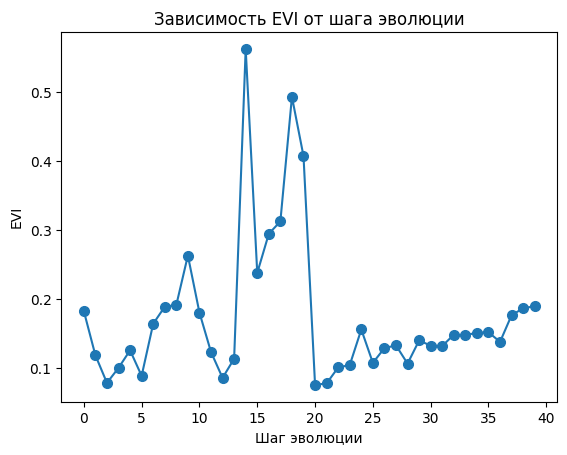

In [14]:
plt.plot(x_gr, y_gr, marker='o', markersize=7)
plt.xlabel('Шаг эволюции') #Хвостовые ингде
plt.ylabel('EVI') #Подпись для оси y
plt.title('Зависимость EVI от шага эволюции') #Название
plt.show()

In [ ]:
med = []
for i in range(30):
    med.append(np.median(pr[i]))

plt.plot(x_gr, med, marker='o', markersize=7)
plt.xlabel('Временной блок') #Хвостовые ингде
plt.ylabel('Медиана данных в блоке') #Подпись для оси y
plt.title('Медиана данных в блоке от времени') #Название
plt.show()

In [158]:
def phillips_loretan(x1, x2):
    """
    Функция теста phillips_loretan для двух последовательностей
    """
    tail_ind_1, tail_num_1 = pm.eye_ball(pm.hill(x1))
    tail_ind_2, tail_num_2 = pm.eye_ball(pm.hill(x2))
    s = (tail_num_1*(tail_ind_2)**2 * (tail_ind_1/tail_ind_2 - 1)**2)/ \
    (tail_ind_1**2 + (tail_num_1/tail_num_2)*tail_ind_2**2)
    return s

In [159]:
group_1 = []
for i in range(0, 10):
    for j in range(0, 10):
        # print(i, j, phillips_loretan(pr[i], pr[j]))
        group_1.append(phillips_loretan(pr[i], pr[j]))

group_1_2 = []
# print('\n')
for i in range(0, 10):
    for j in range(10, 20):
        # print(i, j, phillips_loretan(pr[i], pr[j]))
        group_1_2.append(phillips_loretan(pr[i], pr[j]))

group_2 = []
# print('\n')
for i in range(10, 20):
    for j in range(10, 20):
        # print(i, j, phillips_loretan(pr[i], pr[j]))
        group_2.append(phillips_loretan(pr[i], pr[j]))

print('group_1 \n', min(group_1), max(group_1), '\n')
print('group_2 \n', min(group_2), max(group_2), '\n')
print('group_1_2 \n', min(group_1_2), max(group_1_2), '\n')

group_1 
 0.0 18.565757361257 

group_2 
 0.0 35.23748339664926 

group_1_2 
 0.005084757828938122 44.23590335578281 



In [1]:
phillips_loretan(pr[14], pr[15])

NameError: name 'phillips_loretan' is not defined

<span style="color:orange">
    
## Old code ##

In [6]:
# for i in range(len(edges_ca['source'])):
#     print(i, edges_ca[edges_ca['source'] == i].size)
# print(edges_ca[edges_ca['source'] == 1])

In [7]:
# data = {
#     'Source': [1, 2],
#     'Target': [2, 1],
#     'Node_degree': [1, 1]
# }

# row_labels = [1, 2]

# PA_graph = pd.DataFrame(data=data, index=row_labels)

# flg_PA = 0

# l = []
# if(flg_PA == 1):
#     for i in tqdm(range(3, 10000)):
#         k = (random.choices(PA_graph['Source'].values, weights=PA_graph['Node_degree'].values))[0]
#         if (i == 3):
#             l = [PA_graph['Source'].values, PA_graph['Node_degree'].values]
#         # print(k)
#         PA_graph.loc[i] = [i, k, 1]
#         PA_graph['Node_degree'][k] += 1

# print(l)

In [49]:
# генерация графа CA старая версия
# 
# if(flg_CA == 1):
#     for i in tqdm(range(4, num_nodes_ca)):
#         local_calst = list(nx.clustering(G_ca).values())
#         for j in range(len(local_calst)):
#             local_calst[j] += 0.001
#         k = []
#         for i1 in range(num_neigh):
#             k.append((random.choices(list(nx.clustering(G_ca).keys()), weights=local_calst))[0])
#         for i1 in range(num_neigh):
#             G_ca.add_edge(k[i1], i)
